In [1]:
# seaborn - statistical library created by Michael Waskom

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### LINE PLOTS

In [31]:
s = pd.Series(np.random.randn(10).cumsum(), 
              index=np.arange(0, 100, 10))
s

# avoid index by passing use_index=False
# use ticks and limits to adjust the axis elements

0     0.428156
10    0.627323
20    0.678064
30    0.220656
40    0.059737
50   -1.868434
60   -0.453429
70   -1.421040
80    0.238927
90    0.025674
dtype: float64

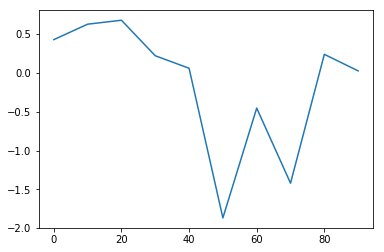

In [32]:
s.plot();

In [33]:
# DF's plot method plots columns as different line on the same subplot
# legend is created automatically
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,-0.611078,0.139940,0.606710,-0.038349
10,-1.577932,0.911294,-0.222417,-0.169542
20,-0.663417,0.154030,-0.574264,0.554228
30,-0.333480,-0.882577,0.188510,-0.324178
40,-0.241294,-0.585305,0.167685,-0.176235
50,0.415191,1.374306,-1.454141,-1.157928
60,-0.101775,1.301533,0.149130,-1.467158
70,-0.573643,2.490721,0.021238,-1.971973
80,-1.305229,2.960623,0.071307,-0.720832
90,-0.624086,2.007331,-1.489655,-0.365901


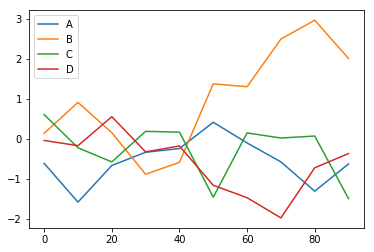

In [34]:
df.plot()

In [35]:
# here df.plot() == df.plot.line()

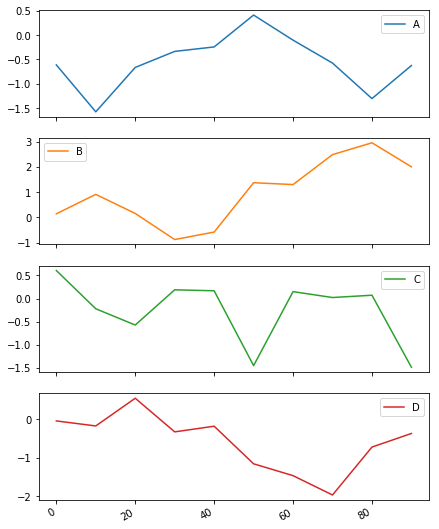

In [36]:
# plot specific arguments
df.plot(subplots=4, figsize=(7, 10));

### BAR PLOTS

In [37]:
# plot.bar() - vertical bar plot
# plot.barh() - horizontal bar plot
# indexes of Series or DF will be used as x(bar) or y(barh) ticks

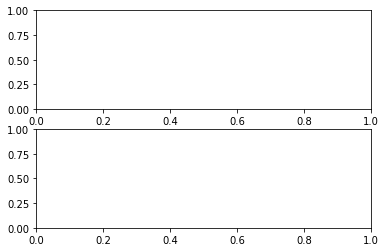

In [39]:
fig, axes = plt.subplots(2, 1)

In [57]:
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data

a    0.070782
b    0.104467
c    0.849736
d    0.729378
e    0.876256
f    0.236743
g    0.661143
h    0.331712
i    0.153846
j    0.916825
k    0.251251
l    0.509727
m    0.252103
n    0.717854
o    0.582517
p    0.567448
dtype: float64

In [58]:
data.plot.bar(ax=axes[0], color='k', alpha=0.7)

In [59]:
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

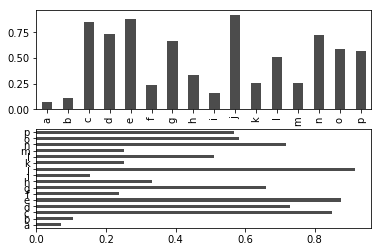

In [60]:
fig, axes = plt.subplots(2, 1)
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [61]:
# plotting bar for a DF
df = pd.DataFrame(np.random.rand(6, 4).cumsum(0),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'C'],
                                  name='Genus'))
df

Genus,A,B,C,C
one,0.492690,0.710937,0.429640,0.698032
two,1.407978,1.676499,1.033336,1.693977
three,2.237118,2.482158,1.257334,1.961568
four,2.382408,2.899299,2.182010,2.787667
five,2.583696,3.541299,2.301087,3.338655
six,2.942360,4.250228,2.964848,3.934833


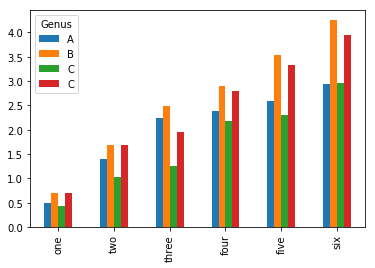

In [62]:
df.plot.bar()

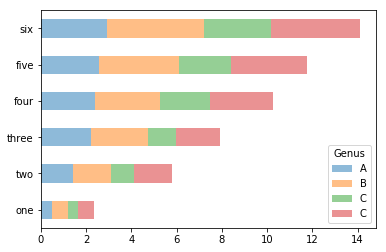

In [63]:
# name of the DF is used as title for legend
# create stacked bar plots by passing stacked=True
# this will stack the values together in each row
df.plot.barh(stacked=True, alpha=0.5)

In [64]:
# performing above with tipping dataset

In [66]:
tips = pd.read_csv('../resources/examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [68]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [70]:
# not many 1-person and 6-person parties
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [71]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


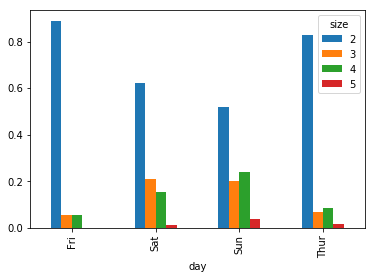

In [72]:
party_pcts.plot.bar()

In [73]:
# seaborn simplifies the requirements of aggregation and summarization
# tipping percentage by day with seaborn

In [74]:
import seaborn as sns

In [75]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [76]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


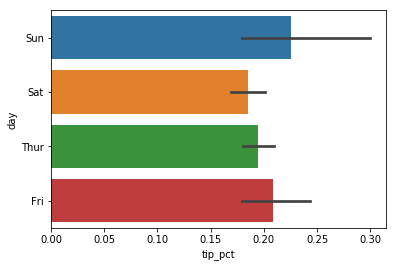

In [77]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

In [78]:
# color bars - average value of tip_pct
# black lines - represent the 95% confidence interval (configurable) 

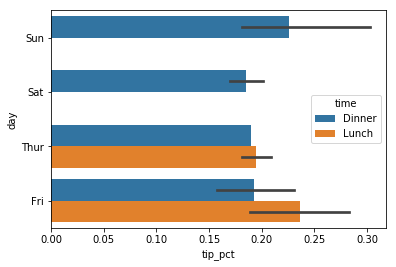

In [80]:
# seaborn.barplot - hue option - enables to split by an additional categorical value
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

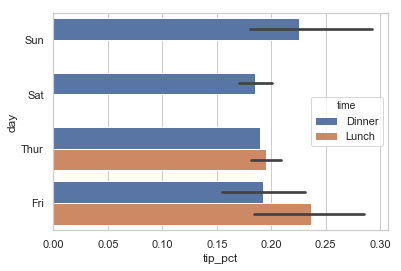

In [83]:
# seaborn has fixed defaults for plot aesthetics
# switch b/w different plot appearances
sns.set(style='whitegrid')
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

### HISTOGRAM AND DENSITY PLOTS

In [84]:
# provides a discretized display of value frequency
# data is split into discrete, evenly spaced bins
# the number of data points in each bin are plotted

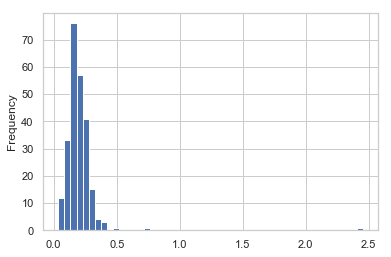

In [85]:
# using tipping data, create histogram of tip percentages of the total bill
tips['tip_pct'].plot.hist(bins=50)

In [86]:
# density plots - formed by computing estimate of a continuous probability distribution
# also know as KDE - kernel density estimate

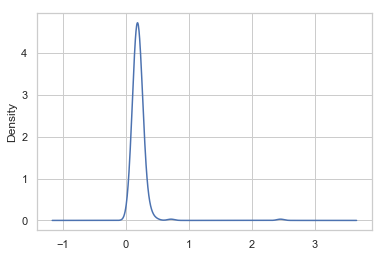

In [87]:
tips['tip_pct'].plot.density()

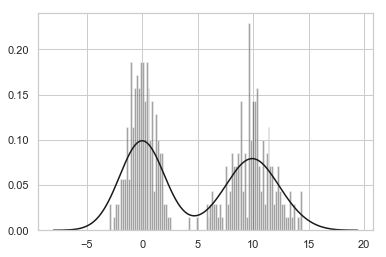

In [88]:
# distplot - plots a histogram and continuous density estimate simultaneously
# Ex. - bimodal distribution consisting of draws from two different standard normal distributions
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### SCATTER OR POINT PLOTS

In [89]:
# useful in examining the relationship b/w two one-dimensional data series

In [91]:
macro = pd.read_csv('../resources/examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()

In [92]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560
